## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [46]:
%config InlineBackend.figure_format = 'svg'

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()

Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [12]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [11]:
y = pd.DataFrame(boston["target"], columns=["price"])

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = boston['feature_names'])

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = boston['feature_names'])

In [25]:
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.846708e-16,6.375538e-17,3.063556e-15,-5.056461e-17,-5.222445e-15,-4.018788e-15,-9.904069e-16,-3.396623e-16,-2.748077e-17,-1.516938e-16,1.999721e-14,5.737984e-15,-1.725792e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.061414e-01,-5.003201e-01,-1.487791e+00,-2.780887e-01,-1.458711e+00,-3.461733e+00,-2.348206e+00,-1.258391e+00,-9.740476e-01,-1.307684e+00,-2.568944e+00,-3.892249e+00,-1.510559e+00
25%,-3.979761e-01,-5.003201e-01,-8.502733e-01,-2.780887e-01,-8.887828e-01,-6.003488e-01,-8.228264e-01,-8.081981e-01,-6.243599e-01,-7.533563e-01,-6.821011e-01,2.098797e-01,-8.005057e-01
50%,-3.776748e-01,-5.003201e-01,-3.521669e-01,-2.780887e-01,-1.572334e-01,-1.494427e-01,3.270201e-01,-2.971196e-01,-5.077973e-01,-4.460660e-01,1.714705e-01,3.830012e-01,-2.157763e-01
75%,-4.582119e-02,3.645893e-01,1.033237e+00,-2.780887e-01,6.338607e-01,4.528240e-01,8.974727e-01,7.481981e-01,3.081406e-01,1.578434e+00,8.453428e-01,4.316600e-01,5.513070e-01
max,9.630689e+00,3.824227e+00,2.433163e+00,3.595975e+00,2.675394e+00,3.477564e+00,1.124581e+00,3.907900e+00,1.706891e+00,1.849573e+00,1.653990e+00,4.441800e-01,3.592534e+00


In [26]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

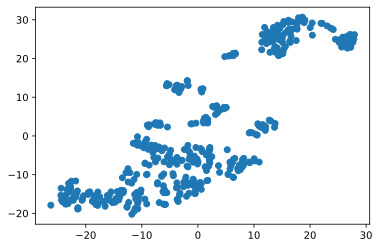

In [47]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [34]:
from sklearn.cluster import KMeans

In [44]:
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state = 42)
labels_train = kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

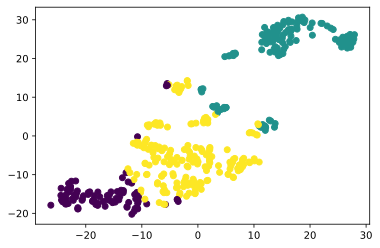

In [48]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [56]:
print('Среднее значение цены {}'.format(y_train.mean()))

Среднее значение цены price    22.796535
dtype: float64


In [63]:
print('Среднее значение цены в Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('Среднее значение цены в Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('Среднее значение цены в Кластер 2: {}'.format(y_train[labels_train == 2].mean()))

Среднее значение цены в Кластер 0: price    27.788372
dtype: float64
Среднее значение цены в Кластер 1: price    16.165354
dtype: float64
Среднее значение цены в Кластер 2: price    24.958115
dtype: float64


In [64]:
print('Средний индекс преступности в Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Средний индекс преступности в Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Средний индекс преступности в Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Средний индекс преступности в Кластер 0: 0.07356558139534884
Средний индекс преступности в Кластер 1: 10.797028425196851
Средний индекс преступности в Кластер 2: 0.4216602094240837


## Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [68]:
test_labels = kmeans.predict(X_test_scaled)

In [69]:
test_labels

array([2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2,
       1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2], dtype=int32)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [72]:
print('Среднее значение цены в Кластер 0: {}'.format(y_test[test_labels == 0].mean()))
print('Среднее значение цены в Кластер 1: {}'.format(y_test[test_labels == 1].mean()))
print('Среднее значение цены в Кластер 2: {}'.format(y_test[test_labels == 2].mean()))

Среднее значение цены в Кластер 0: price    28.413636
dtype: float64
Среднее значение цены в Кластер 1: price    16.437143
dtype: float64
Среднее значение цены в Кластер 2: price    22.031111
dtype: float64


In [73]:
print('Средний индекс преступности в Кластер 0: {}'.format(X_test.loc[test_labels == 0, 'CRIM'].mean()))
print('Средний индекс преступности в Кластер 1: {}'.format(X_test.loc[test_labels == 1, 'CRIM'].mean()))
print('Средний индекс преступности в Кластер 2: {}'.format(X_test.loc[test_labels == 2, 'CRIM'].mean()))

Средний индекс преступности в Кластер 0: 0.07985181818181818
Средний индекс преступности в Кластер 1: 10.165531142857143
Средний индекс преступности в Кластер 2: 0.2845831111111111
